# 1. Overview

This document aims to show with simple examples each of the key points in the [Progress Doc](https://docs.google.com/document/d/1XMNXktCoSabnFWZf9rJFoaKMzsA1bbv7x1Xh9tXkKYk/edit#heading=h.gq20wfhs4tmi).

---

# 2. Helper Code

---

In [1]:
#@title Imports
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from collections import Counter
import random
import string

In [2]:
#@title Functions / Classes
def check_prime(num):
  if(num <= 1):
    return False
  for i in range(2, int(math.sqrt(num)) + 1):
      if (num % i == 0):
        return False
  return True

class UUID:
  def __init__(self):
    self.next = 0
    self.map = { }
    self.invMap = { }

  def getUniqueID(self, val):
      if val not in self.map:
        self.map[val] = self.next
        self.invMap[self.next] = val
        self.next += 1
      return self.map[val]

def fill_out(data):
  ml = max([ len(m) for m in data ])
  return [ m + [np.NaN] * (ml - len(m)) for m in data ]

def imshow_clean(data, to_label=False, ascii=False):
  plt.figure(figsize = (40,5))
  plt.imshow(data, interpolation="nearest")
  plt.axis('off')
  
  if to_label:
    for y in range(len(data)):
      for x in range(len(data[y])):
        if not math.isnan(data[y][x]):
          label = int(data[y][x]) if not ascii else chr(int(data[y][x]) + 32)
          plt.text(x, y, label, ha="center", va="center", fontsize="6", alpha=(0.1 if data[y][x] == 0 else 0.9))
  
  plt.show()

def checkIsomorphic(str_a, str_b):
  # Extract indices from strings
  dict_a = {}
  dict_b = {}
  for i, value in enumerate(str_a): dict_a[value] = dict_a.get(value, []) + [i]
  for i, value in enumerate(str_b): dict_b[value] = dict_b.get(value, []) + [i]
  repeats = any([ len(dict_a[value]) > 1 for value in dict_a ])
  isIsomorphic = repeats and sorted(dict_a.values()) == sorted(dict_b.values())

  # Extract pattern from indices
  uuid = UUID()
  isoPattern = None
  if isIsomorphic:
    isoPattern = [ uuid.getUniqueID(str(dict_a[l])) + 1 if len(dict_a[l]) > 1 else np.nan for l in str_a ]

  return isIsomorphic, isoPattern, uuid.next

def getIsomorphs(txt_1, txt_2):
  # Check each start / end
  isomorphs = []
  txt_len = min(len(txt_1), len(txt_2))
  for start in range(txt_len):
    for end in range(txt_len, start, -1):
      c1, c2 = txt_1[start:end], txt_2[start:end]
      if c1 == c2: break
      isIsomorphic, pattern, count = checkIsomorphic(c1, c2)
      if isIsomorphic:
        isomorphs.append(( start, end, pattern, count ))
        break

  # Find largest encompassing isomorphs
  isomorphs.sort(key=lambda iso: iso[0] - iso[1])
  i1, i2 = 0, 0
  while i1 < len(isomorphs):
    i1r = ( isomorphs[i1][0], isomorphs[i1][1] )
    i2 = i1 + 1
    while i2 < len(isomorphs):
      i2r = ( isomorphs[i2][0], isomorphs[i2][1] )
      if i2r[0] <= i1r[1] and i2r[1] >= i1r[0] and (i2r[1] - i2r[0]) < (i1r[1] - i1r[0]):
        isomorphs.remove(isomorphs[i2])
        i2 -= 1
      i2 += 1
    i1 += 1
  
  return isomorphs

In [25]:
#@title Eye Data
messages = [
    [50, 66, 5, 48, 62, 13, 75, 29, 24, 61, 42, 70, 66, 62, 32, 14, 81, 8, 15, 78, 2, 29, 13, 49, 1, 80, 82, 40, 63, 81, 21, 19, 0, 40, 51, 65, 26, 14, 21, 70, 47, 44, 48, 42, 19, 48, 13, 47, 19, 49, 72, 31, 5, 24, 3, 43, 59, 67, 33, 49, 41, 60, 21, 26, 30, 5, 25, 20, 71, 11, 74, 56, 4, 74, 19, 71, 4, 51, 41, 43, 80, 72, 54, 63, 79, 81, 15, 16, 44, 31, 30, 12, 33, 57, 28, 13, 64, 43, 48],
    [80, 66, 5, 48, 62, 13, 75, 29, 24, 61, 42, 70, 66, 62, 32, 14, 81, 8, 15, 78, 2, 29, 13, 49, 1, 29, 11, 30, 52, 81, 21, 19, 0, 25, 26, 54, 20, 14, 21, 70, 47, 44, 48, 42, 19, 48, 13, 47, 19, 49, 44, 26, 59, 77, 64, 43, 79, 28, 72, 64, 1, 30, 73, 23, 67, 6, 33, 25, 64, 81, 68, 46, 17, 36, 13, 17, 21, 68, 13, 9, 46, 67, 57, 34, 62, 82, 15, 10, 73, 62, 2, 11, 65, 72, 37, 44, 10, 43, 68, 62, 9, 34, 18],
    [36, 66, 5, 48, 62, 13, 75, 29, 24, 61, 42, 70, 66, 62, 32, 14, 81, 8, 15, 78, 2, 29, 13, 49, 1, 69, 76, 52, 9, 48, 66, 80, 22, 64, 57, 40, 49, 78, 3, 16, 56, 19, 47, 40, 80, 6, 13, 64, 29, 49, 64, 63, 6, 49, 31, 13, 16, 10, 45, 24, 26, 77, 10, 60, 81, 61, 34, 54, 70, 21, 15, 4, 66, 77, 42, 37, 30, 22, 0, 11, 41, 72, 57, 20, 23, 57, 65, 41, 23, 18, 72, 42, 5, 3, 26, 78, 8, 5, 54, 45, 77, 25, 64, 61, 16, 44, 54, 51, 20, 63, 25, 11, 26, 45, 53, 60, 38, 34],
    [76, 66, 5, 49, 75, 54, 69, 46, 32, 1, 42, 60, 26, 48, 50, 80, 32, 24, 55, 61, 47, 12, 21, 12, 49, 54, 34, 25, 36, 15, 56, 55, 20, 9, 8, 62, 13, 82, 9, 44, 29, 60, 53, 82, 42, 80, 5, 43, 71, 3, 80, 77, 47, 78, 34, 25, 62, 18, 10, 49, 62, 64, 52, 81, 11, 66, 62, 13, 47, 17, 52, 70, 26, 23, 32, 31, 64, 23, 35, 32, 50, 6, 1, 25, 8, 37, 47, 43, 26, 76, 65, 68, 80, 17, 7, 45, 63, 14, 53, 63, 60, 16],
    [63, 66, 5, 49, 75, 54, 2, 60, 29, 40, 78, 47, 60, 75, 67, 71, 60, 2, 65, 7, 47, 14, 45, 74, 59, 41, 80, 13, 60, 13, 81, 22, 35, 50, 40, 39, 2, 59, 48, 31, 76, 2, 80, 75, 1, 56, 67, 11, 21, 8, 40, 65, 45, 75, 55, 39, 60, 42, 13, 3, 22, 57, 2, 6, 58, 9, 70, 1, 58, 56, 63, 68, 25, 79, 7, 20, 19, 64, 2, 66, 73, 30, 71, 16, 12, 30, 65, 37, 20, 13, 22, 63, 18, 46, 64, 59, 41, 81, 82, 22, 78, 36, 47, 17, 4, 6, 17, 5, 36, 79, 63, 1, 64, 69, 15, 43, 4, 58, 56, 31, 14, 64, 58, 18, 44, 78, 69, 1, 0, 46, 20, 71, 73, 25, 35, 8, 24],
    [34, 66, 5, 49, 75, 54, 23, 74, 11, 13, 28, 26, 19, 48, 67, 57, 37, 60, 34, 28, 74, 10, 17, 32, 11, 18, 19, 43, 19, 81, 42, 4, 62, 9, 46, 49, 32, 51, 76, 58, 4, 43, 47, 17, 67, 79, 21, 32, 44, 16, 30, 37, 26, 28, 41, 68, 57, 34, 51, 10, 69, 70, 8, 6, 46, 43, 18, 39, 47, 43, 15, 13, 33, 30, 35, 62, 37, 0, 37, 5, 38, 55, 37, 13, 40, 25, 9, 21, 11, 64, 5, 79, 42, 68, 11, 71, 11, 48, 3, 67, 61, 40, 22, 14, 35, 50, 61, 39, 11, 2, 66, 49, 51, 53, 17, 73, 36, 75, 74, 54, 24, 30, 54, 70],
    [27, 66, 5, 49, 75, 54, 2, 60, 29, 40, 2, 55, 9, 15, 59, 18, 68, 3, 36, 5, 47, 77, 44, 38, 1, 18, 28, 76, 4, 34, 60, 63, 58, 80, 17, 54, 79, 75, 48, 54, 55, 19, 62, 64, 14, 47, 51, 70, 75, 5, 11, 47, 45, 58, 68, 69, 79, 25, 38, 45, 73, 47, 68, 50, 34, 45, 78, 26, 79, 57, 4, 56, 22, 60, 18, 75, 43, 60, 59, 67, 63, 42, 49, 33, 40, 65, 79, 77, 7, 3, 26, 62, 31, 78, 26, 57, 69, 40, 4, 23, 26, 13, 67, 42, 38, 72, 11, 39, 65, 60, 25, 6, 80, 66, 68, 77, 59, 78, 19],
    [77, 66, 5, 49, 75, 54, 2, 60, 29, 40, 2, 55, 9, 15, 59, 18, 68, 3, 36, 5, 47, 60, 21, 80, 1, 72, 55, 16, 82, 35, 57, 19, 1, 66, 18, 27, 39, 17, 74, 81, 39, 14, 78, 0, 25, 65, 43, 66, 64, 38, 81, 23, 24, 50, 57, 30, 71, 75, 26, 68, 54, 57, 56, 50, 71, 73, 14, 21, 8, 32, 26, 63, 5, 37, 19, 43, 66, 47, 53, 34, 66, 23, 73, 31, 54, 38, 77, 67, 11, 63, 79, 6, 22, 21, 51, 69, 74, 21, 5, 17, 67, 37, 29, 21, 60, 14, 82, 44, 30, 4, 20, 42, 35, 1, 31, 54, 46, 20, 40, 30],
    [33, 66, 5, 49, 75, 54, 2, 60, 29, 40, 2, 55, 9, 15, 59, 18, 68, 3, 36, 5, 47, 33, 21, 59, 44, 18, 28, 76, 59, 34, 60, 63, 79, 27, 12, 54, 5, 49, 48, 54, 55, 52, 62, 72, 69, 10, 57, 22, 58, 48, 67, 53, 7, 34, 32, 30, 31, 19, 26, 8, 34, 46, 7, 30, 71, 55, 34, 75, 54, 9, 6, 60, 5, 23, 25, 45, 42, 80, 25, 12, 22, 76, 20, 51, 62, 21, 40, 9, 41, 10, 44, 73, 8, 33, 70, 73, 6, 31, 21, 72, 5, 40, 61, 51, 42, 66, 64, 74, 61, 25, 63, 42, 24, 41]
]

messages_raw = [
  ["200", "231", "010", "143", "222", "023", "300", "104", "044", "221", "132", "240", "231", "222", "112", "024", "311", "013", "030", "303", "002", "104", "023", "144", "001", "310", "312", "130", "223", "311", "041", "034", "000", "130", "201", "230", "101", "024", "041", "240", "142", "134", "143", "132", "034", "143", "023", "142", "034", "144", "242", "111", "010", "044", "003", "133", "214", "232", "113", "144", "131", "220", "041", "101", "110", "010", "100", "040", "241", "021", "244", "211", "004", "244", "034", "241", "004", "201", "131", "133", "310", "242", "204", "223", "304", "311", "030", "031", "134", "111", "110", "022", "113", "212", "103", "023", "224", "133", "143"],
  ["310", "231", "010", "143", "222", "023", "300", "104", "044", "221", "132", "240", "231", "222", "112", "024", "311", "013", "030", "303", "002", "104", "023", "144", "001", "104", "021", "110", "202", "311", "041", "034", "000", "100", "101", "204", "040", "024", "041", "240", "142", "134", "143", "132", "034", "143", "023", "142", "034", "144", "134", "101", "214", "302", "224", "133", "304", "103", "242", "224", "001", "110", "243", "043", "232", "011", "113", "100", "224", "311", "233", "141", "032", "121", "023", "032", "041", "233", "023", "014", "141", "232", "212", "114", "222", "312", "030", "020", "243", "222", "002", "021", "230", "242", "122", "134", "020", "133", "233", "222", "014", "114", "033"],
  ["121", "231", "010", "143", "222", "023", "300", "104", "044", "221", "132", "240", "231", "222", "112", "024", "311", "013", "030", "303", "002", "104", "023", "144", "001", "234", "301", "202", "014", "143", "231", "310", "042", "224", "212", "130", "144", "303", "003", "031", "211", "034", "142", "130", "310", "011", "023", "224", "104", "144", "224", "223", "011", "144", "111", "023", "031", "020", "140", "044", "101", "302", "020", "220", "311", "221", "114", "204", "240", "041", "030", "004", "231", "302", "132", "122", "110", "042", "000", "021", "131", "242", "212", "040", "043", "212", "230", "131", "043", "033", "242", "132", "010", "003", "101", "303", "013", "010", "204", "140", "302", "100", "224", "221", "031", "134", "204", "201", "040", "223", "100", "021", "101", "140", "203", "220", "123", "114"],
  ["301", "231", "010", "144", "300", "204", "234", "141", "112", "001", "132", "220", "101", "143", "200", "310", "112", "044", "210", "221", "142", "022", "041", "022", "144", "204", "114", "100", "121", "030", "211", "210", "040", "014", "013", "222", "023", "312", "014", "134", "104", "220", "203", "312", "132", "310", "010", "133", "241", "003", "310", "302", "142", "303", "114", "100", "222", "033", "020", "144", "222", "224", "202", "311", "021", "231", "222", "023", "142", "032", "202", "240", "101", "043", "112", "111", "224", "043", "120", "112", "200", "011", "001", "100", "013", "122", "142", "133", "101", "301", "230", "233", "310", "032", "012", "140", "223", "024", "203", "223", "220", "031"],
  ["223", "231", "010", "144", "300", "204", "002", "220", "104", "130", "303", "142", "220", "300", "232", "241", "220", "002", "230", "012", "142", "024", "140", "244", "214", "131", "310", "023", "220", "023", "311", "042", "120", "200", "130", "124", "002", "214", "143", "111", "301", "002", "310", "300", "001", "211", "232", "021", "041", "013", "130", "230", "140", "300", "210", "124", "220", "132", "023", "003", "042", "212", "002", "011", "213", "014", "240", "001", "213", "211", "223", "233", "100", "304", "012", "040", "034", "224", "002", "231", "243", "110", "241", "031", "022", "110", "230", "122", "040", "023", "042", "223", "033", "141", "224", "214", "131", "311", "312", "042", "303", "121", "142", "032", "004", "011", "032", "010", "121", "304", "223", "001", "224", "234", "030", "133", "004", "213", "211", "111", "024", "224", "213", "033", "134", "303", "234", "001", "000", "141", "040", "241", "243", "100", "120", "013", "044"],
  ["114", "231", "010", "144", "300", "204", "043", "244", "021", "023", "103", "101", "034", "143", "232", "212", "122", "220", "114", "103", "244", "020", "032", "112", "021", "033", "034", "133", "034", "311", "132", "004", "222", "014", "141", "144", "112", "201", "301", "213", "004", "133", "142", "032", "232", "304", "041", "112", "134", "031", "110", "122", "101", "103", "131", "233", "212", "114", "201", "020", "234", "240", "013", "011", "141", "133", "033", "124", "142", "133", "030", "023", "113", "110", "120", "222", "122", "000", "122", "010", "123", "210", "122", "023", "130", "100", "014", "041", "021", "224", "010", "304", "132", "233", "021", "241", "021", "143", "003", "232", "221", "130", "042", "024", "120", "200", "221", "124", "021", "002", "231", "144", "201", "203", "032", "243", "121", "300", "244", "204", "044", "110", "204", "240"],
  ["102", "231", "010", "144", "300", "204", "002", "220", "104", "130", "002", "210", "014", "030", "214", "033", "233", "003", "121", "010", "142", "302", "134", "123", "001", "033", "103", "301", "004", "114", "220", "223", "213", "310", "032", "204", "304", "300", "143", "204", "210", "034", "222", "224", "024", "142", "201", "240", "300", "010", "021", "142", "140", "213", "233", "234", "304", "100", "123", "140", "243", "142", "233", "200", "114", "140", "303", "101", "304", "212", "004", "211", "042", "220", "033", "300", "133", "220", "214", "232", "223", "132", "144", "113", "130", "230", "304", "302", "012", "003", "101", "222", "111", "303", "101", "212", "234", "130", "004", "043", "101", "023", "232", "132", "123", "242", "021", "124", "230", "220", "100", "011", "310", "231", "233", "302", "214", "303", "034"],
  ["302", "231", "010", "144", "300", "204", "002", "220", "104", "130", "002", "210", "014", "030", "214", "033", "233", "003", "121", "010", "142", "220", "041", "310", "001", "242", "210", "031", "312", "120", "212", "034", "001", "231", "033", "102", "124", "032", "244", "311", "124", "024", "303", "000", "100", "230", "133", "231", "224", "123", "311", "043", "044", "200", "212", "110", "241", "300", "101", "233", "204", "212", "211", "200", "241", "243", "024", "041", "013", "112", "101", "223", "010", "122", "034", "133", "231", "142", "203", "114", "231", "043", "243", "111", "204", "123", "302", "232", "021", "223", "304", "011", "042", "041", "201", "234", "244", "041", "010", "032", "232", "122", "104", "041", "220", "024", "312", "134", "110", "004", "040", "132", "120", "001", "111", "204", "141", "040", "130", "110"],
  ["113", "231", "010", "144", "300", "204", "002", "220", "104", "130", "002", "210", "014", "030", "214", "033", "233", "003", "121", "010", "142", "113", "041", "214", "134", "033", "103", "301", "214", "114", "220", "223", "304", "102", "022", "204", "010", "144", "143", "204", "210", "202", "222", "242", "234", "020", "212", "042", "213", "143", "232", "203", "012", "114", "112", "110", "111", "034", "101", "013", "114", "141", "012", "110", "241", "210", "114", "300", "204", "014", "011", "220", "010", "043", "100", "140", "132", "310", '100', '022', '042', '301', '040', '201', '222', '041', '130', '014', '131', '020', '134', '243', '013', '113', '240', '243', '011', '111', '041', '242', '010', '130', '221', '201', '132', '231', '224', '244', '221', '100', '223', '132', '044', '131']
]

msg_count = len(messages)
min_length = min([ len(msg) for msg in messages ])
max_length = max([ len(msg) for msg in messages ])
print(f"{msg_count} messages, {min_length} - {max_length} length range")

9 messages, 99 - 137 length range


In [36]:
#@title Random Data
messages_random = []
messages_random_raw = []

def regenerate_random():
  messages_random.clear()
  messages_random_raw.clear()

  for i in range(msg_count):
    messages_random.append([ random.randint(0, 125) for _ in range(random.randint(95, 135)) ])
    messages_random_raw.append([ np.base_repr(v, base=5).rjust(3, "0") for v in messages_random[i] ])

regenerate_random()

# 3. Demonstrations

---

## 3.1. Plain Messages

Image of the 9 messages stacked, with trigram values 0-82 labelled.  
Each row represents a message, with each cell representing a trigram.  

In [38]:
#@title Code
def show_plain(messages, ascii=False):
  im = np.full((msg_count, max_length), np.nan)
  for y in range(msg_count):
    for x in range(len(messages[y])):
      im[y, x] = messages[y][x]
  imshow_clean(im, True, ascii)

### Eye Data

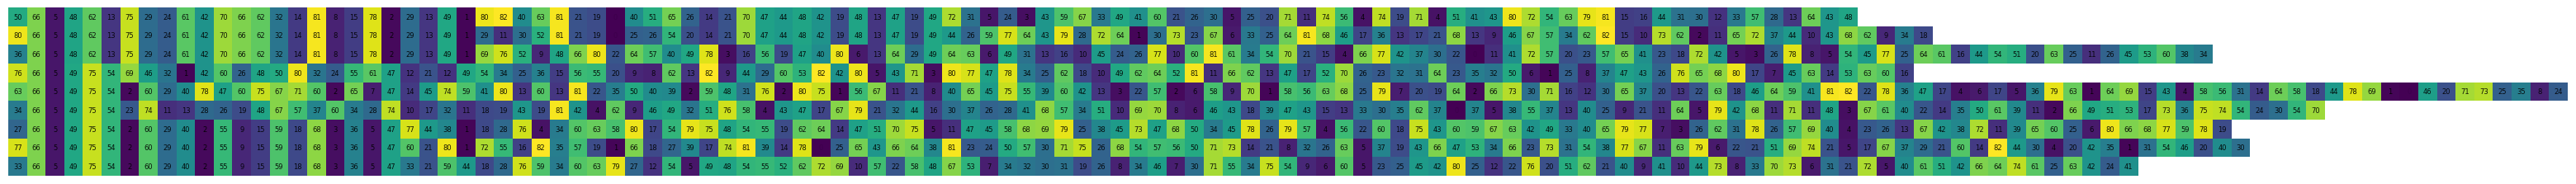

In [39]:
show_plain(messages)

### Random Data

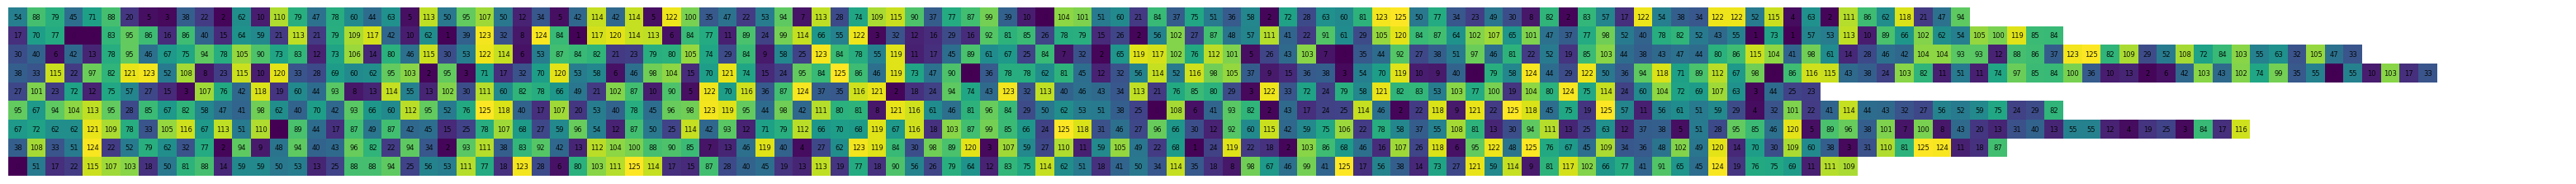

In [43]:
regenerate_random()
show_plain(messages_random)

## 3.2. Shared Sections

Each message shown row by row.  
Matching trigrams labelled and shown.  
<br />
**Observation:** Large shared sections between messages.  
**Observation:** The 1st letter differs in every message, but the 2nd is the same.  
**Key Takeaway:** Each message has to of been encoded by the same algorithm.  

In [44]:
# @title Code
def show_shared(messages):
  im = np.full((len(messages), max([ len(m) for m in messages ])), np.nan)
  for y in range(len(messages)):
    for x in range(len(messages[y])):
      matching = sum([ (other[x] == messages[y][x]) if len(other) > x else 0 for other in messages ])
      im[y, x] = messages[y][x] if matching > 1 else np.nan

  imshow_clean(im, True)


def show_shared_unique(messages):
  im = np.full((len(messages), max([ len(m) for m in messages ])), np.nan)
  
  for x in range(max_length):
    matches = [ ]

    for y1 in range(len(messages)):
      for y2 in range(y1 + 1, len(messages)):
        
        if len(messages[y1]) <= x or len(messages[y2]) <= x:
          continue

        if messages[y1][x] == messages[y2][x]:
          if messages[y1][x] not in matches: matches.append(messages[y1][x])
          ind = str(matches.index(messages[y1][x]) + 1)
          im[y1][x] = ind
          im[y2][x] = ind
   
  imshow_clean(im, True)

### Eye Data

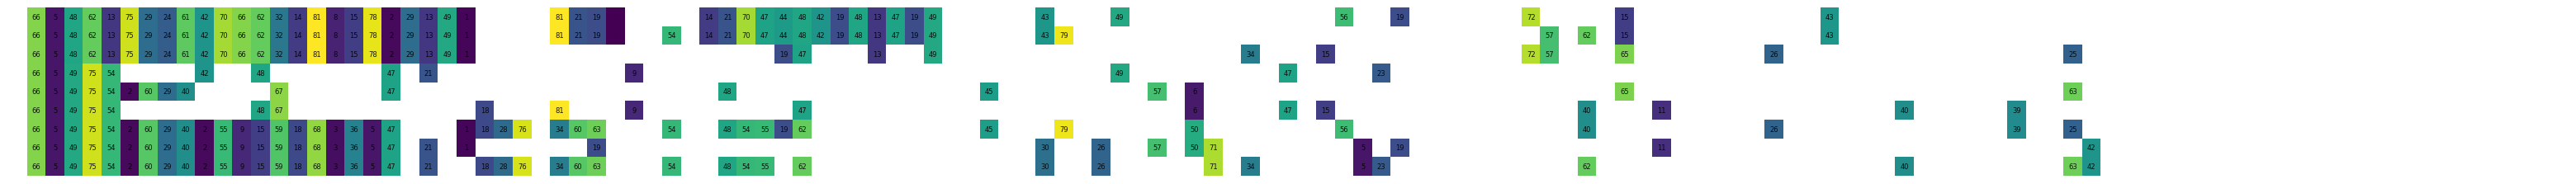

In [45]:
show_shared(messages)

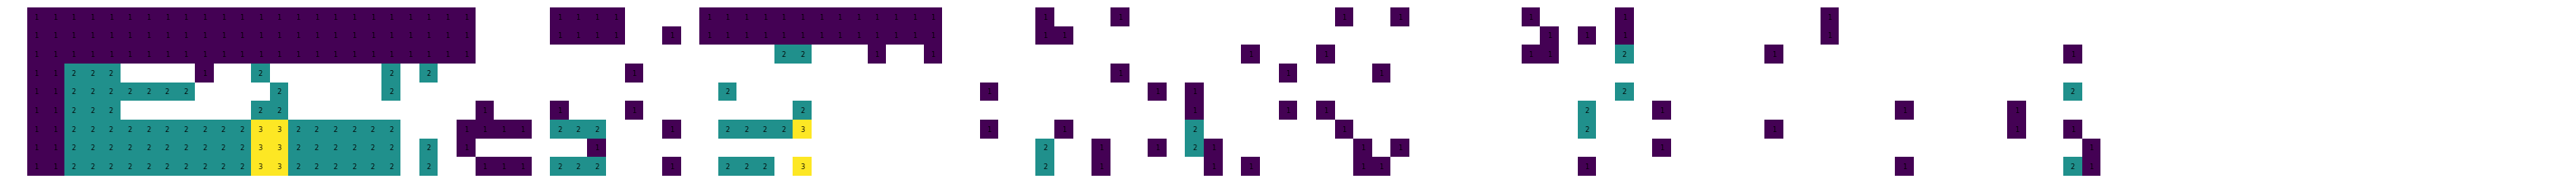

In [46]:
show_shared_unique(messages)

### Random Data

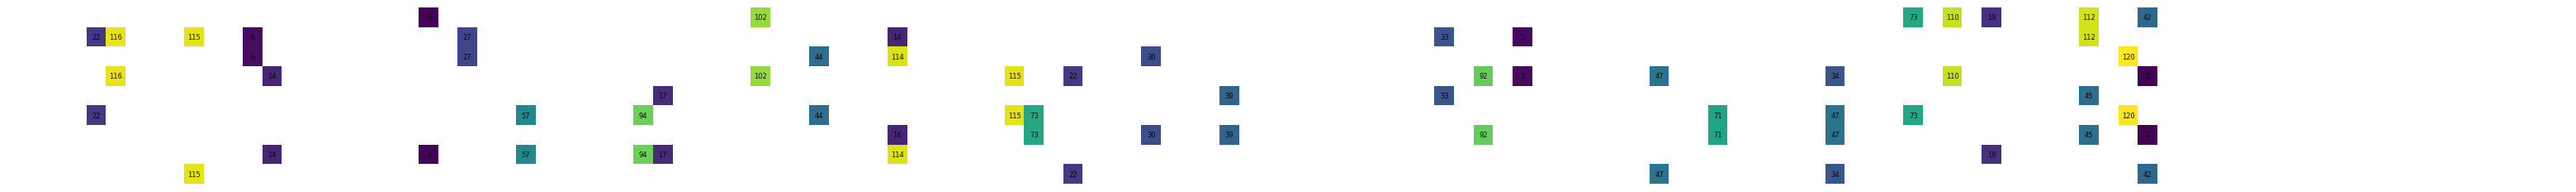

In [49]:
regenerate_random()
show_shared(messages_random)

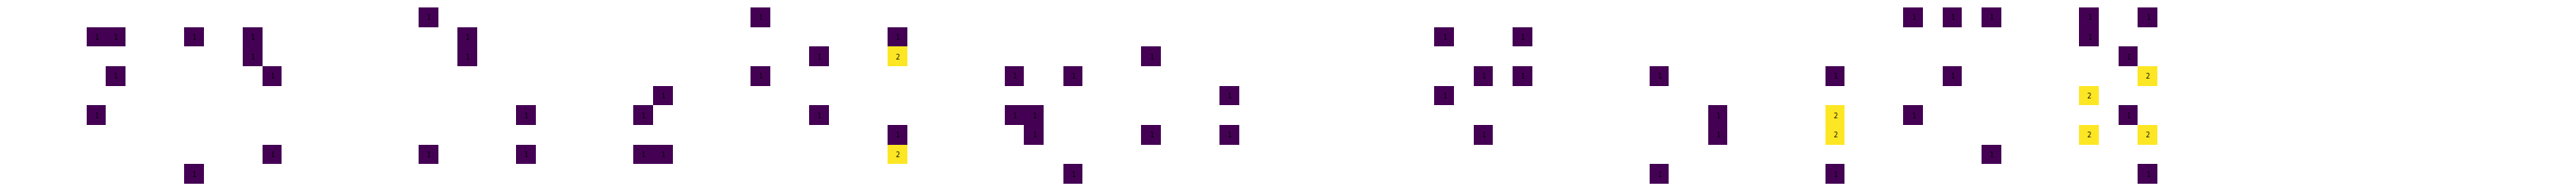

In [50]:
show_shared_unique(messages_random)

## 3.3. Reading Order (83)

Messages read as triplets of individual eyes.  
Data in `eye_messages_raw` by default is in 123123 format.  
6x6 grid represents each of the permutations of this reading order.  
<br />
**Observation:** Reading the eyes as trigrams with 123123 gives contiguous 0-82.  
**Key Takeaway:** No other reading order works the same amount.  

In [51]:
#@title Code 
def read(raw, order):
  return int(raw[order[0] - 1] + raw[order[1] - 1] + raw[order[2] - 1], 5)

def plot_reading_orders(messages_raw):
  perms = list(permutations([1, 2, 3]))
  fig, axs = plt.subplots(6, 6, figsize=(1, 1), dpi=850)

  counters = { }
  for x, p1 in enumerate(perms):
    for y, p2 in enumerate(perms):
      label = "".join([ str(a) for a in p1 + p2 ])

      counter = Counter()
      for message_raw in messages_raw:
        parsed = [ read(v, p1) if i % 2 == 0 else read(v, p2) for i,v in enumerate(message_raw) ]
        counter.update(parsed)
      counters[label] = counter

      data_x = range(125)
      data_y = [counter[a] for a in data_x]
      axs[x, y].bar(data_x, data_y)
      axs[x, y].axis("off")
      axs[x, y].set_title(label, pad=-2, fontdict={ 'fontsize': 0.5 }, alpha=0.4, y=0.05)
  
  plt.show()
  return counters

def get_runs_from_labelled_freq(labelled_freq):
  for label in labelled_freq:
    runs = []
    current_run = None
    for i in range(0, 125):
    
      if labelled_freq[label][i] > 0:
        current_run = current_run or [i, i]
        current_run[1] = i

      elif current_run is not None:
        runs.append(current_run)
        current_run = None

    if current_run is not None:
        runs.append(current_run)

    print(f"Runs for {label}: {runs}")

### Eye Data

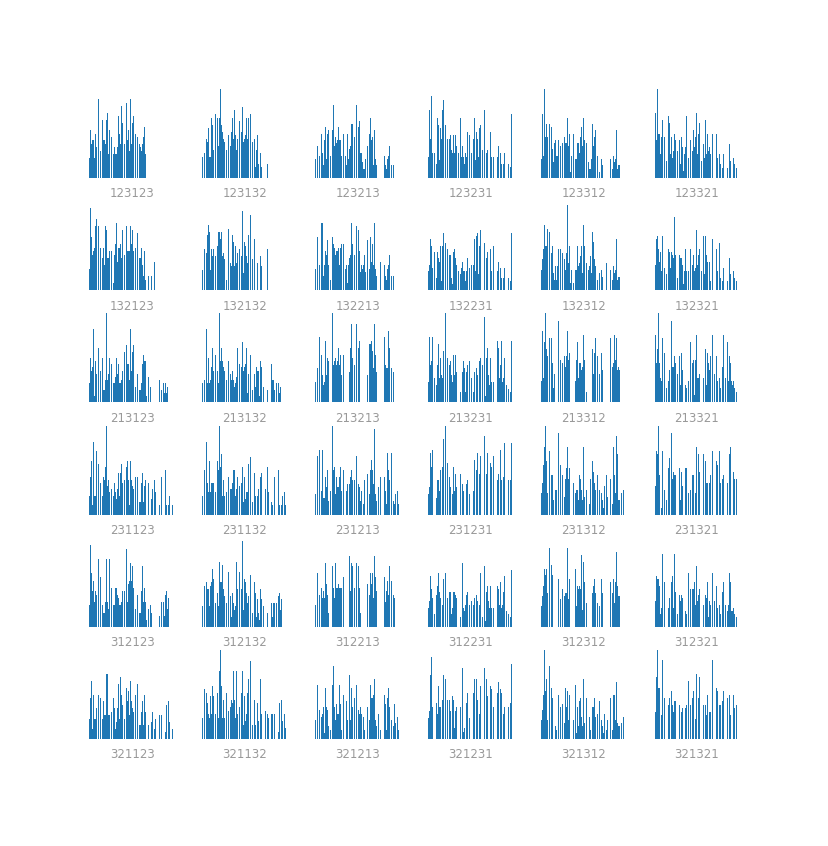

In [52]:
messages_freq = plot_reading_orders(messages_raw)

In [53]:
get_runs_from_labelled_freq(messages_freq)

Runs for 123123: [[0, 82]]
Runs for 123132: [[0, 82], [85, 86], [90, 90], [95, 95]]
Runs for 123213: [[0, 89], [100, 114]]
Runs for 123231: [[0, 82], [85, 87], [90, 92], [95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 123312: [[0, 90], [100, 115]]
Runs for 123321: [[0, 82], [85, 87], [90, 92], [95, 97], [100, 103], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 132123: [[0, 82], [85, 86], [90, 90], [95, 95]]
Runs for 132132: [[0, 76], [80, 81], [85, 86], [90, 90], [95, 95]]
Runs for 132213: [[0, 90], [95, 95], [100, 114]]
Runs for 132231: [[0, 77], [80, 82], [85, 87], [90, 92], [95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 132312: [[0, 90], [95, 95], [100, 115]]
Runs for 132321: [[0, 78], [80, 82], [85, 87], [90, 92], [95, 97], [100, 103], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 213123: [[0, 89], [100, 114]]
Runs for 213132: [[0, 90], [95, 95], [100, 114]]
Runs for 213213: [[0, 19], [25, 42], [50

### Random Data

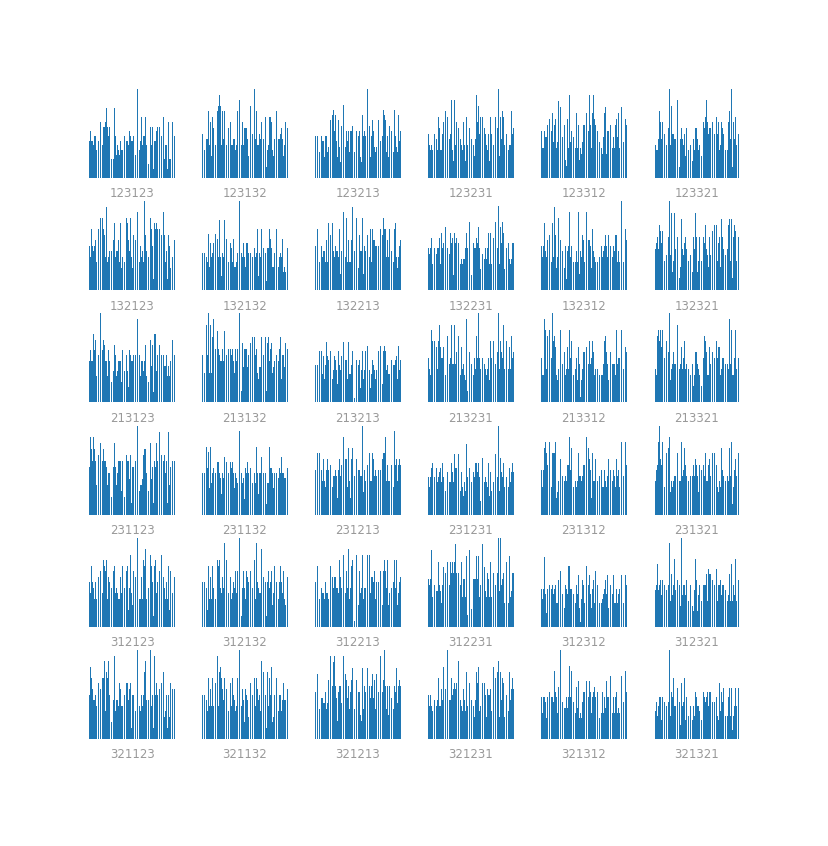

In [54]:
regenerate_random()
random_labelled_freq = plot_reading_orders(messages_random_raw)

In [28]:
get_runs_from_labelled_freq(random_labelled_freq)

Runs for 123123: [[0, 124]]
Runs for 123132: [[0, 124]]
Runs for 123213: [[0, 124]]
Runs for 123231: [[0, 124]]
Runs for 123312: [[0, 124]]
Runs for 123321: [[0, 124]]
Runs for 132123: [[0, 124]]
Runs for 132132: [[0, 124]]
Runs for 132213: [[0, 124]]
Runs for 132231: [[0, 124]]
Runs for 132312: [[0, 124]]
Runs for 132321: [[0, 124]]
Runs for 213123: [[0, 124]]
Runs for 213132: [[0, 124]]
Runs for 213213: [[0, 124]]
Runs for 213231: [[0, 124]]
Runs for 213312: [[0, 124]]
Runs for 213321: [[0, 124]]
Runs for 231123: [[0, 124]]
Runs for 231132: [[0, 124]]
Runs for 231213: [[0, 124]]
Runs for 231231: [[0, 124]]
Runs for 231312: [[0, 124]]
Runs for 231321: [[0, 124]]
Runs for 312123: [[0, 124]]
Runs for 312132: [[0, 124]]
Runs for 312213: [[0, 124]]
Runs for 312231: [[0, 124]]
Runs for 312312: [[0, 124]]
Runs for 312321: [[0, 124]]
Runs for 321123: [[0, 124]]
Runs for 321132: [[0, 124]]
Runs for 321213: [[0, 124]]
Runs for 321231: [[0, 124]]
Runs for 321312: [[0, 124]]
Runs for 321321: [[0

## 3.4. Prime Lengths

Lengths of each of the messages.  
<br />
**Key Takeaway:** Cannot split messages into sections.  

In [55]:
#@title Code
def print_prime_info(messages):
  print("Length of messages:")
  print("-------------------")
  for i in range(msg_count):
    l = len(messages[i])
    print(f"{i}: {l}, prime: {check_prime(l)}")

### Eye Data

In [57]:
print_prime_info(messages)

Length of messages:
-------------------
0: 99, prime: False
1: 103, prime: True
2: 118, prime: False
3: 102, prime: False
4: 137, prime: True
5: 124, prime: False
6: 119, prime: False
7: 120, prime: False
8: 114, prime: False


### Random Data

In [31]:
regenerate_random()
print_prime_info(messages_random)

Length of messages:
-------------------
0: 113, prime: True
1: 134, prime: False
2: 95, prime: False
3: 101, prime: True
4: 98, prime: False
5: 115, prime: False
6: 101, prime: True
7: 108, prime: False
8: 108, prime: False


## 3.5. Gaps and Isomorphs

Show the number of gaps of each length across each message.  
<br />
**Observation:** There are no consecutive letters.  
**Observation:** There are isomorphs visible from the gaps.  

In [98]:
#@title Code
def get_gaps(messages, limit=-1, include_end=False, replace=True):
  gap_im = np.full((len(messages), max([ len(m) for m in messages ])), np.nan)
  for y in range(len(messages)):
    msg_len = len(messages[y])
    for i in range(msg_len):
      upper_bounds = msg_len if (limit == -1) else min(i + limit + 2, msg_len)
      for j in range(i + 1, upper_bounds):
        if messages[y][i] == messages[y][j]:
          gap = (j - i) if replace else messages[y][i]
          gap_im[y][i] = gap
          if include_end: gap_im[y][j] = gap
          break
  return gap_im

def get_repeats(messages):
  repeats_im = np.full((len(messages), max_length), np.nan)
  for y in range(len(messages)):
    repeats = 0
    found = set()
    for x in range(len(messages[y])):
      if messages[y][x] in found:
        repeats += 1
      found.add(messages[y][x])
      repeats_im[y][x] = repeats
  return repeats_im


def show_gap_freq(gap_im):
  gaps = { }
  for y in range(len(gap_im)):
    for x in range(len(gap_im[y])):
      if not math.isnan(gap_im[y][x]):
        if gap_im[y][x] not in gaps: gaps[gap_im[y][x]] = 1
        else: gaps[gap_im[y][x]] += 1

  x = range(1, 11)
  y = [ gaps[i] if i in gaps else 0 for i in x ]
  plt.figure(figsize = (3,3))
  plt.bar(x, y)

### Eye Data

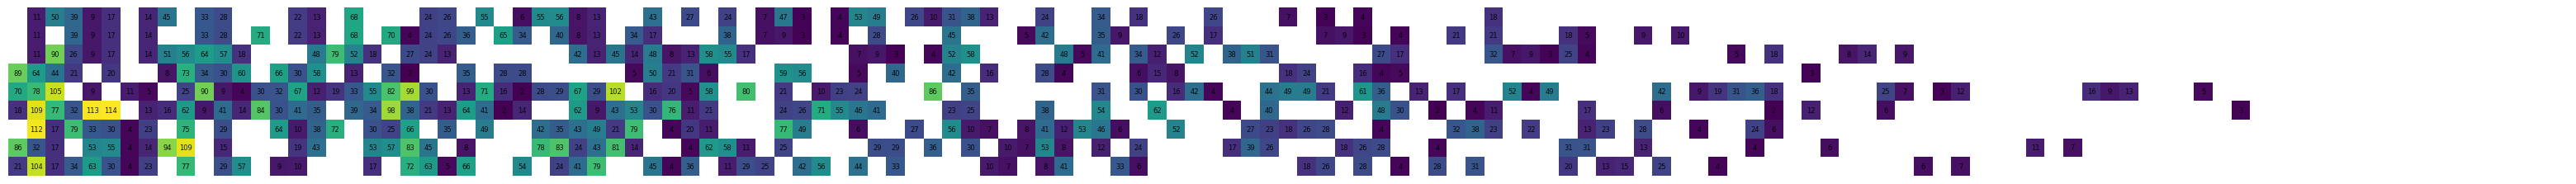

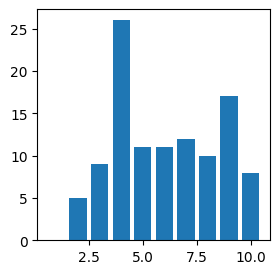

In [33]:
gap_im = get_gaps(messages)
imshow_clean(gap_im, True)
show_gap_freq(gap_im)

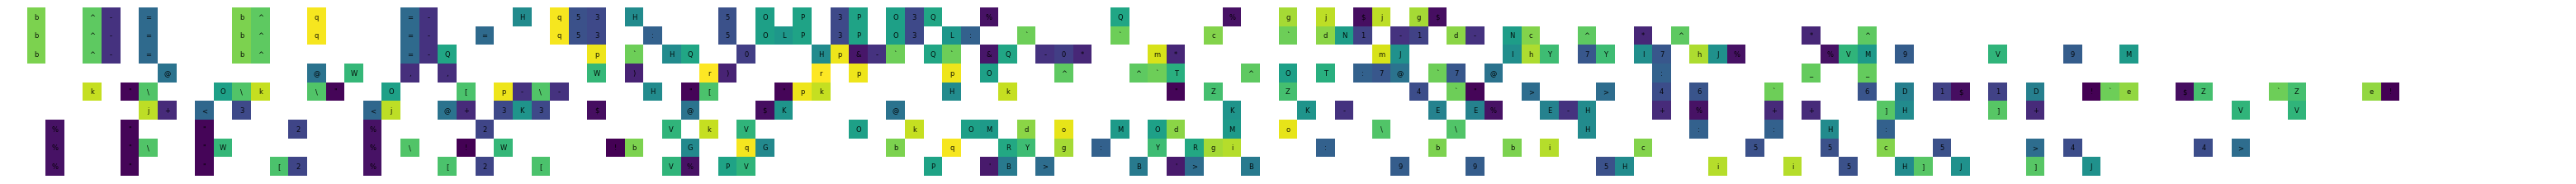

In [34]:
small_gap_im = get_gaps(messages, 16, True, False)
imshow_clean(small_gap_im, True, True)

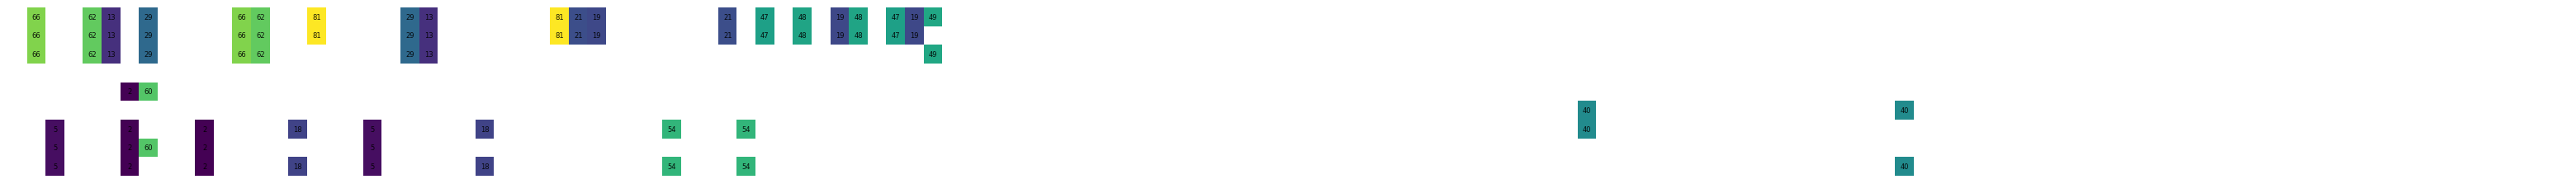

In [35]:
show_shared(small_gap_im)

### Random Data

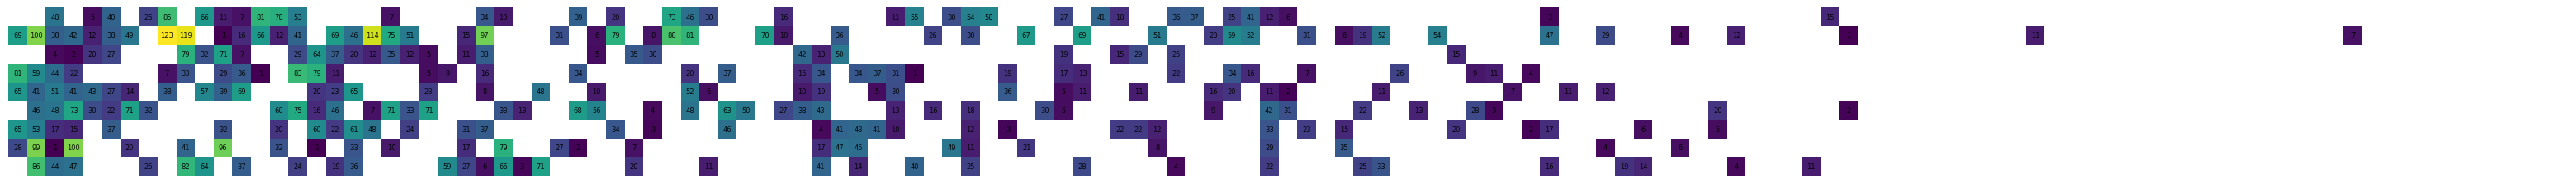

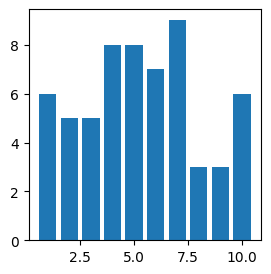

In [36]:
random_gap_im = get_gaps(messages_random)
imshow_clean(random_gap_im, True)
show_gap_freq(random_gap_im)

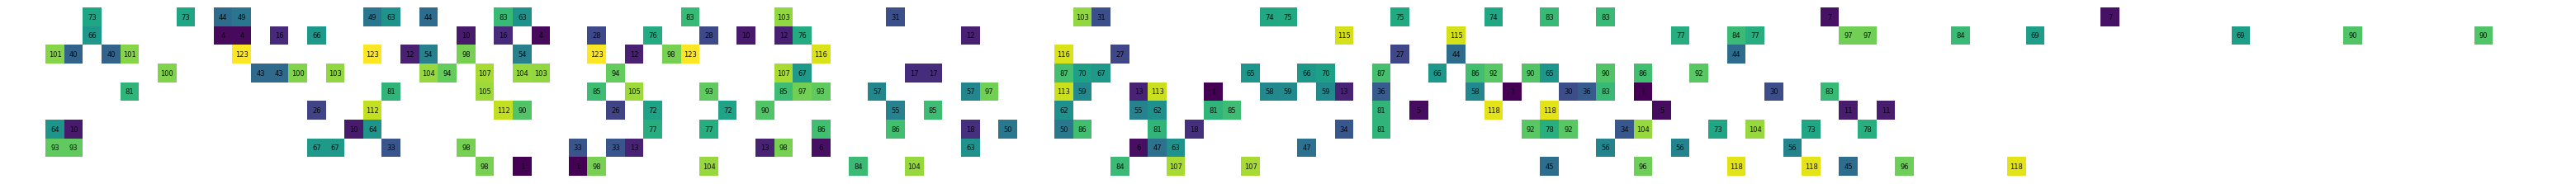

In [37]:
random_small_gap_im = get_gaps(messages_random, 16, True, False)
imshow_clean(random_small_gap_im, True)

# Other
---

Messages plain (CIPHERTEXT_NUM)


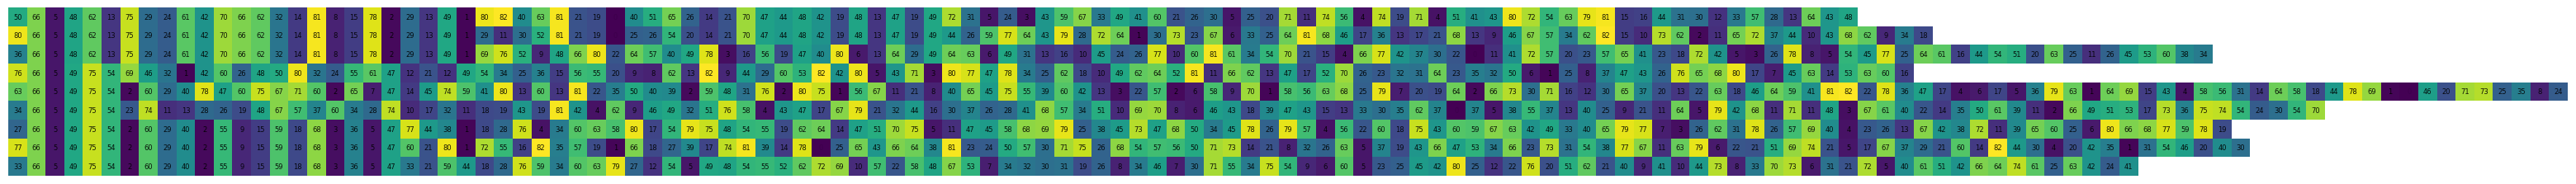

Messages plain (CIPHERTEXT_ASCII)


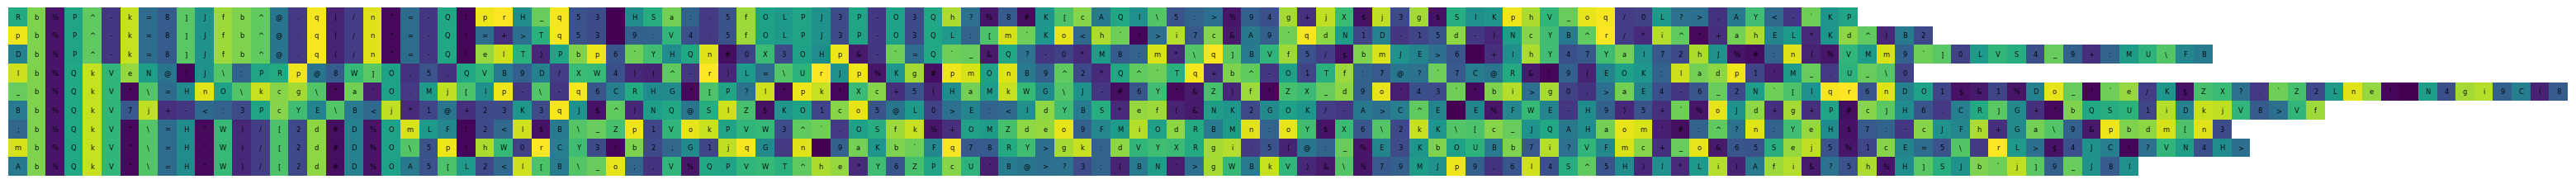


Messages shared sections (CIPHERTEXT_NUM)


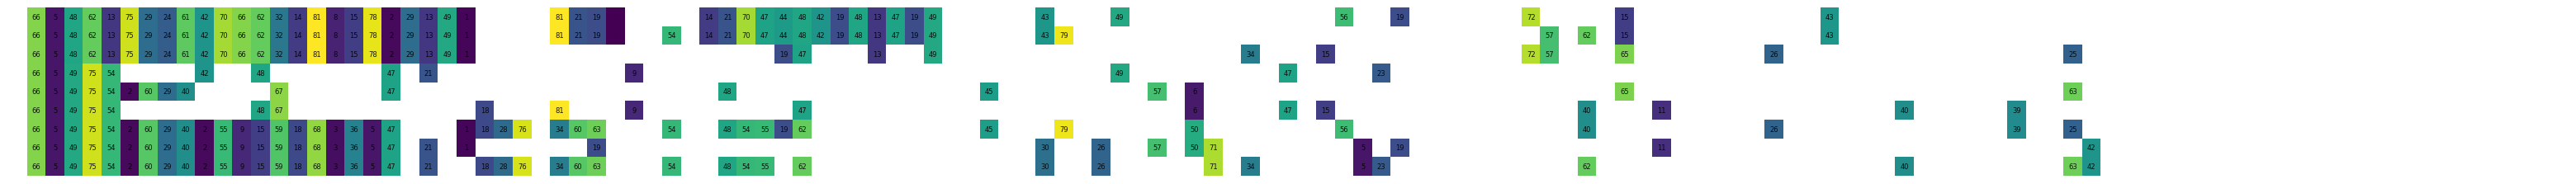


Gaps (Start + end) (GAP_SIZE)


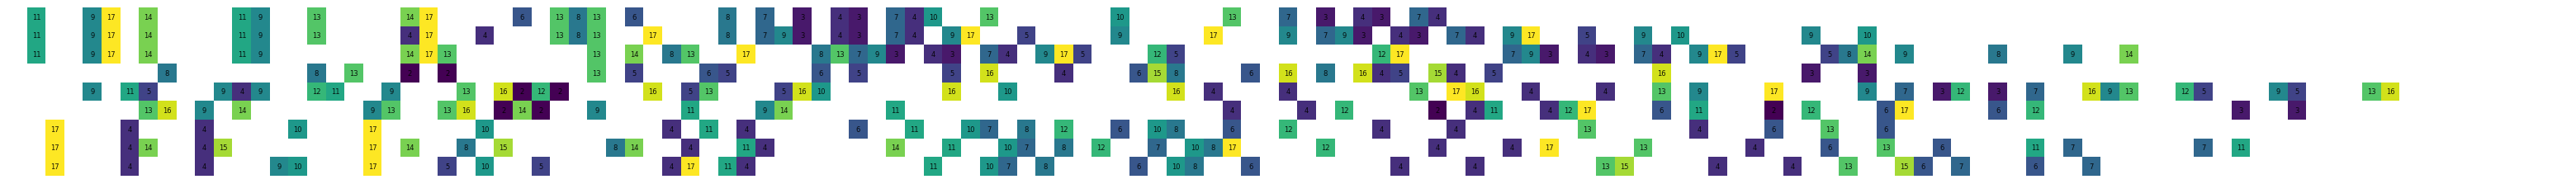


Gaps (Only start) (GAP_SIZE)


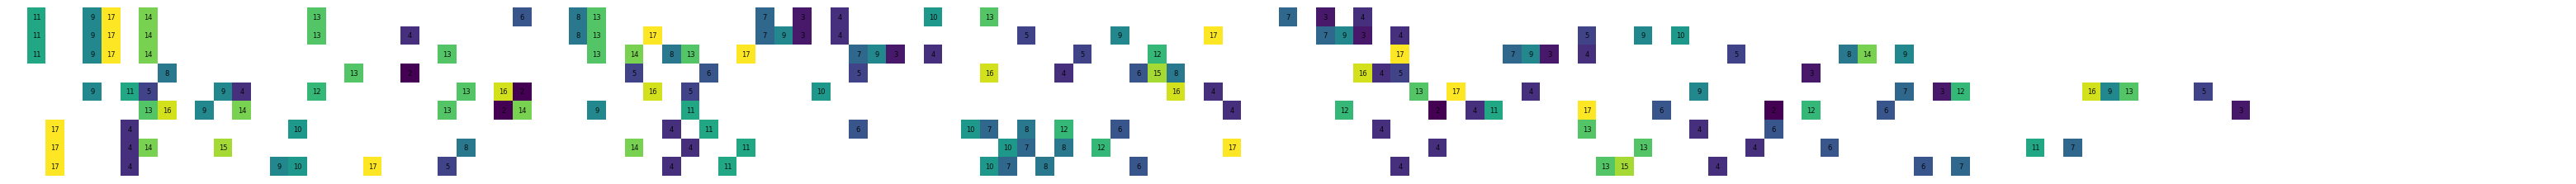


Repeats (REPEAT_COUNT)


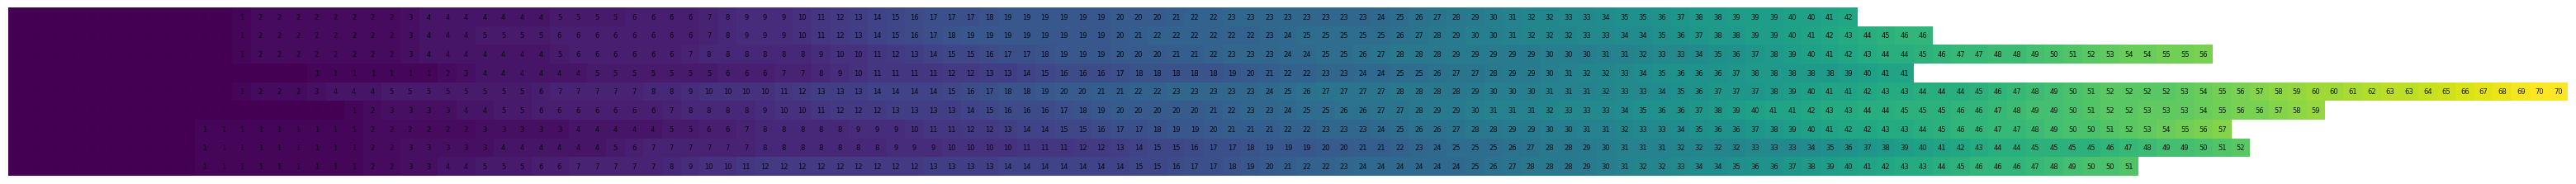

In [38]:

print("Messages plain (CIPHERTEXT_NUM)")
show_plain(messages, False)

print("Messages plain (CIPHERTEXT_ASCII)")
show_plain(messages, True)

print("\nMessages shared sections (CIPHERTEXT_NUM)")
show_shared(messages)

print("\nGaps (Start + end) (GAP_SIZE)")
small_gap_im_gap = get_gaps(messages, 16, True, True)
imshow_clean(small_gap_im_gap, True, False)

print("\nGaps (Only start) (GAP_SIZE)")
small_gap_im_gap_starts = get_gaps(messages, 16, False, True)
imshow_clean(small_gap_im_gap_starts, True, False)

print("\nRepeats (REPEAT_COUNT)")
im_repeats = get_repeats(messages)
imshow_clean(im_repeats, True, False)

# New Cipher
---

In [138]:
class Cipher:
    pt_alphabet: list
    ct_alphabet: list
    _pt: list

    def __init__(self, pt_alphabet: list, ct_alphabet: list):
        self.pt_alphabet = pt_alphabet
        self.ct_alphabet = ct_alphabet

    def p(self, i):
        return self._pt[i]
    
    def factor(self, i):
        return 2

    def c(self, i):
        return (self.p(i) * self.factor(i)) % len(self.ct_alphabet)

    def prepare_pt(self, m):
        cm = m.replace(" ", "").replace(".", "").lower()
        return [ self.pt_alphabet.index(l) for l in cm ]
    
    def encode(self, pt: list):
        self._pt = pt
        return [ self.c(i) for i,l in enumerate(pt) ]


In [139]:
pt_alphabet = list(string.ascii_lowercase)
ct_alphabet = list(range(83))

print(f"Plaintext Alphabet ({len(pt_alphabet)}): {pt_alphabet}")
print(f"Ciphertext Alphabet ({len(ct_alphabet)}): {ct_alphabet}")

cipher = Cipher(pt_alphabet, ct_alphabet)

all_m = [
    "The sacrifice of oneself to the pursuit of knowledge Is the highest trizbute to the gods.",
    "The sacrifice of zoneself to the pursuit ozf knowledge Is the highest tribute zto the gods.",
    "The sacrifice of onezself to the pursuit of knowledge Is the hizghest tribute to the gods."  
]

all_pt = [ cipher.prepare_pt(m) for m in all_m ]
all_ct = [ cipher.encode(pt) for pt in all_pt ]

all_pt = fill_out(all_pt)
all_ct = fill_out(all_ct)

Plaintext Alphabet (26): ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Ciphertext Alphabet (83): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


Plaintext


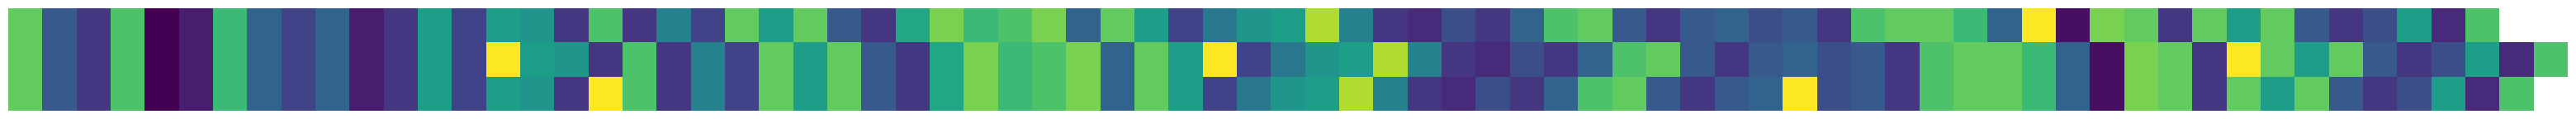

Ciphertext


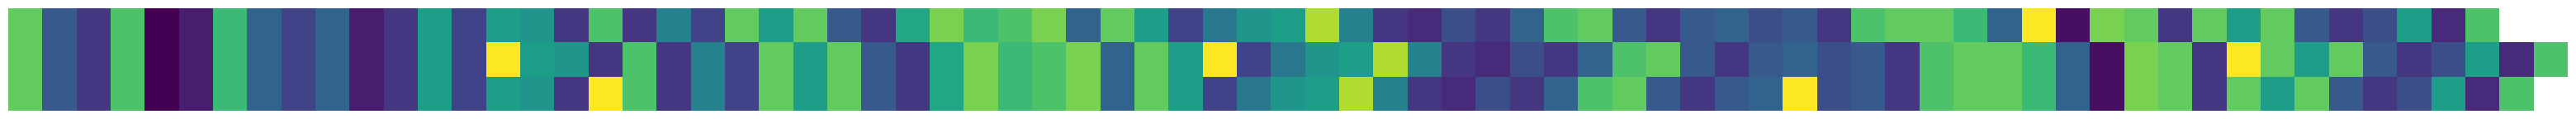

Ciphertext Shared


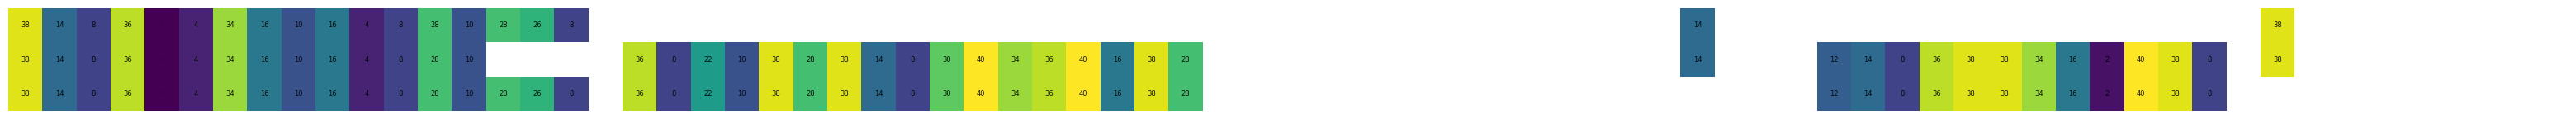

Small Gaps


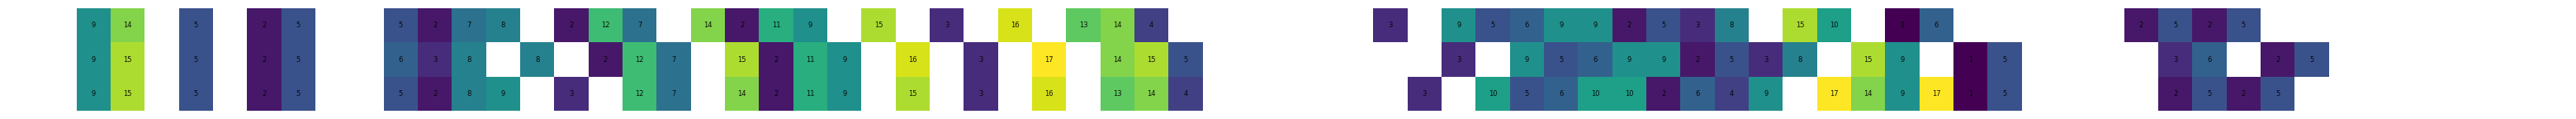

All Gaps


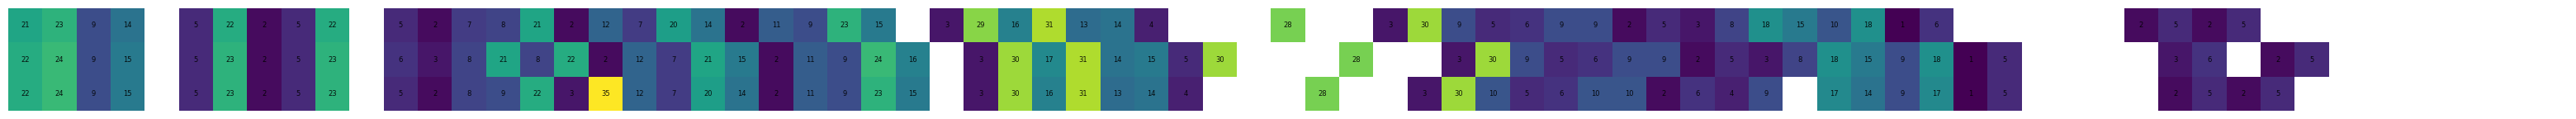

Gap Frequency


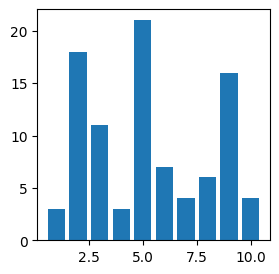

In [140]:
print("Plaintext")
imshow_clean(all_pt)

print("Ciphertext")
imshow_clean(all_ct)

print("Ciphertext Shared")
show_shared(all_ct)

print("Small Gaps")
small_gap_ct = get_gaps(all_ct, 16, False, True)
imshow_clean(small_gap_ct, True)

print("All Gaps")
gap_ct = get_gaps(all_ct, -1, False, True)
imshow_clean(gap_ct, True)

print("Gap Frequency")
show_gap_freq(gap_ct)